# Retrain object detection from jupyter for cleaner flow and tensorboard

# 1. Import Dependencies

In [1]:
import os
!pip install wget
import wget


### 1.0 Clone Tensorflow model repo and Download model

In [ ]:
!cd {os.getcwd()}
!git clone https://github.com/tensorflow/models


### 1.1 Download Protocol buffers and extract to protoc path

In [ ]:
PROTOC_PATH = os.path.join('protoc')

In [ ]:
zip

!cd {os.getcwd()}
url="https://github.com/protocolbuffers/protobuf/releases/download/v21.2/protoc-21.2-win64.zip"
wget.download(url)
PROTOC_PATH = os.path.join('protoc')
!mkdir PROTOC
!move protoc-21.2-win64.zip {PROTOC_PATH}
!cd {PROTOC_PATH} && tar -xf protoc-21.2-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(PROTOC_PATH, 'bin')) 


### 1.2 Install tensorflow object detection api & protocol buffers

In [ ]:
!cd models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd models/research/slim && pip install -e . 

### 1.3 Verify Correct Installation

In [2]:
VERIFICATION_SCRIPT = os.path.join('models', 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.12: C:\ProgramData\Anaconda3\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-08-19 04:54:00.500047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-19 04:54:00.833547: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7446 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6
C:\ProgramData\Anaconda3\lib\site-packages\object_detection\builders\model_builder.py:1102: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0819 04:54:01.148384 32880 model

In [3]:
!pip install tensorflow --upgrade

  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1

In [4]:
#Verify if object_detection can be imported

In [5]:
import object_detection

In [6]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.1.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.0
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyio                         3.5.0
apache-beam                   2.40.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
avro-python3                  1.10.2
Babel                         2.9.1
bac

### 1.4 Download tensorflow model ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8

In [ ]:
#https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
#right-click on model and paste into url

In [ ]:
os.getcwd()

In [5]:
PRETRAINED_MODEL_NAME = 'ssd_resnet152_v1_fpn_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet152_v1_fpn_640x640_coco17_tpu-8.tar.gz'

#!cd C:/Programming/Blackjack_counter_jupyter/models/research/object_detection
#download and extract tf model from tf model zoo
wget.download(PRETRAINED_MODEL_URL)
!mkdir pretrained_models
!move ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz {os.path.join('pretrained_models')}
!cd pretrained_models && tar -zxvf {PRETRAINED_MODEL_NAME+ '.tar.gz'}

100% [........................................................................] 20518283 / 20518283

A subdirectory or file pretrained_models already exists.


        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


# 1.5 Download playing card dataset in TFRecord format
https://universe.roboflow.com/augmented-startups/playing-cards-ow27d 

In [ ]:
!mkdir data

Select v1->TFRecord format-> and extract into /data folder

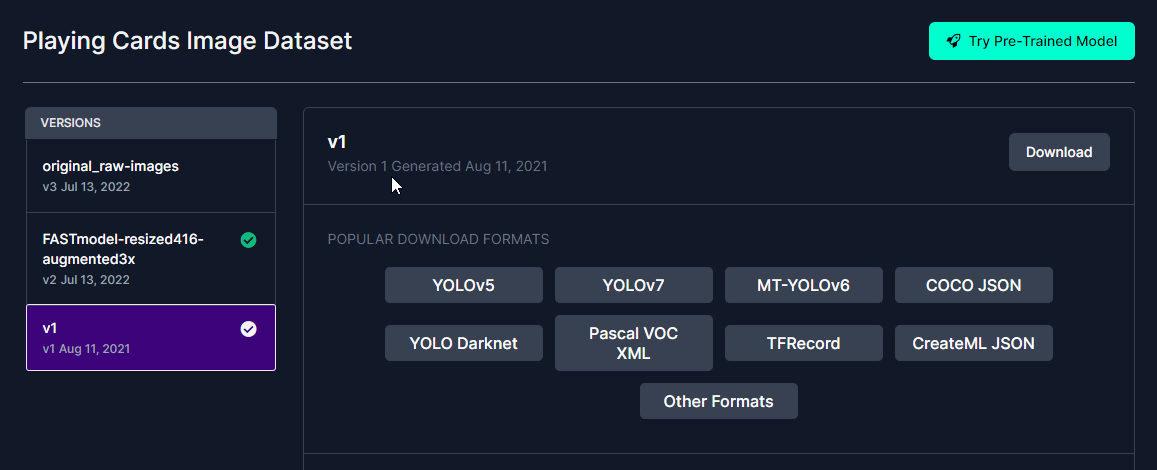

# 2. Create Label Map

In [ ]:
#52 cards: 13 x 4 (2->A, Clubs, Spades, Hearts, Diamonds)

labels = [
    {'name':'AH', 'id':1},
    {'name' : '2H','id': 2},
    {'name' : '3H','id': 3},
    {'name' : '4H','id': 4},
    {'name' : '5H','id': 5},
    {'name' : '6H','id': 6},
    {'name' : '7H','id': 7},
    {'name' : '8H','id': 8},
    {'name' : '9H','id': 9},
    {'name' : '10H','id': 10},
    {'name' : 'JH','id': 11},
    {'name' : 'QH','id': 12},
    {'name' : 'KH','id': 13},
    {'name' : 'AS','id': 14},
    {'name' : '2S','id': 15},
    {'name' : '3S','id': 16},
    {'name' : '4S','id': 17},
    {'name' : '5S','id': 18},
    {'name' : '6S','id': 19},
    {'name' : '7S','id': 20},
    {'name' : '8S','id': 21},
    {'name' : '9S','id': 22},
    {'name' : '10S','id': 23},
    {'name' : 'JS','id': 24},
    {'name' : 'QS','id': 25},
    {'name' : 'KS','id': 26},
    {'name' : 'AC','id': 27},
    {'name' : '2C','id': 28},
    {'name' : '3C','id': 29},
    {'name' : '4C','id': 30},
    {'name' : '5C','id': 31},
    {'name' : '6C','id': 32},
    {'name' : '7C','id': 33},
    {'name' : '8C','id': 34},
    {'name' : '9C','id': 35},
    {'name' : '10C','id': 36},
    {'name' : 'JC','id': 37},
    {'name' : 'QC','id': 38},
    {'name' : 'KC','id': 39},
    {'name' : 'AD','id': 40},
    {'name' : '2D','id': 41},
    {'name' : '3D','id': 42},
    {'name' : '4D','id': 43},
    {'name' : '5D','id': 44},
    {'name' : '6D','id': 45},
    {'name' : '7D','id': 46},
    {'name' : '8D','id': 47},
    {'name' : '9D','id': 48},
    {'name' : '10D','id': 49},
    {'name' : 'JD','id': 50},
    {'name' : 'QD','id': 51},
    {'name' : 'KD','id': 52},
]

!mkdir LABEL_MAPS
label_map_path = os.path.join('LABEL_MAPS','labelmap.pbtxt')
with open(label_map_path, 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname :\'{}\'\n'.format(label['name'])) 
        f.write('\tid : {}\n'.format(label['id']))
        f.write('}\n')


# 3. Create TFRecords

### 3.1 Copy annotation csv files to one folder

In [ ]:
tf_record_script_path = os.path.join('scripts','blackjack_tfrecord_gen.py')

train_images_path = os.path.join('data','train')
train_annotations_path = os.path.join('data','train','_annotations.csv')

test_images_path = os.path.join('data','test')
test_annotations_path = os.path.join('data','test','_annotations.csv')

val_images_path = os.path.join('data','val')
val_annotations_path = os.path.join('data','valid','_annotations.csv')


In [ ]:
#Need to edit the tfrecord script ot match label map

### 4.1 Run tfrecord script for train/test/val

In [ ]:
!python {os.path.join('scripts','blackjack_tfrecord_gen.py')}  --csv_input={train_annotations_path} --output_path=data/train.record --image_dir={os.path.join('data','train')}

In [ ]:
!python {os.path.join('scripts','blackjack_tfrecord_gen.py')}  --csv_input={test_annotations_path} --output_path=data/test.record --image_dir={os.path.join('data','test')}

In [ ]:
!python {os.path.join('scripts','blackjack_tfrecord_gen.py')}  --csv_input={val_annotations_path} --output_path=data/val.record --image_dir={os.path.join('data','valid')}

### 5. Copy Model Config to Training Folder

In [ ]:
os.name

In [ ]:
!mkdir trained_models

In [ ]:
os.getcwd()

In [ ]:
#security of folders: "the sysetm cannot find the file specified"
#manually copied
!copy {os.path.join(os.getcwd(),'pretrained_models','ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8','pipeline.config')} {'model_checkpoints'}

In [ ]:
#!copy {os.path.join('scripts','pipeline.config')}

### 6. Update Model Pipeline Config for Transfer Learning

In [6]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format
#if error: ImportError: cannot import name 'builder' from 'google.protobuf.internal' (C:\ProgramData\Anaconda3\lib\site-packages\google\protobuf\internal\__init__.py
#python -m pip install --upgrade protobuf, -> rerun protoc object_detection/protos/*.proto --python_out=.
#for some reason 3.20.1 works, but 3.19.4 allows tensorboard to work
#pip install protobuf==3.20.1

In [ ]:
pipeline_config_filepath = os.path.join('pretrained_models','ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8','pipeline.config')
config = config_util.get_configs_from_pipeline_file(pipeline_config_filepath)


In [ ]:
config 

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(pipeline_config_filepath, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
#Need to edit several parameters in the pipeline config:
#1. number of classes = 52 
#2. fine_tune_checkpoint file paths, 
#3. CHANGE classification->detection
#4. train_input_config file path
#5. eval_input paths

In [ ]:
pipeline_config

In [ ]:
pipeline_config.model.ssd.num_classes = 52 
pipeline_config.train_config.batch_size = 4
#edit this path if training is interrupted
pipeline_config.train_config.fine_tune_checkpoint=os.path.join(os.getcwd(),'pretrained_models','ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8','checkpoint','ckpt-0')

#pipeline_config.train_config.fine_tune_checkpoint ="C:/Programming/models/research/object_detection/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0"
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path =os.path.join(os.getcwd(),'LABEL_MAPS','labelmap.pbtxt')  #"C:/Programming/BJ_Counter/LABEL_MAPS/labelmap.pbtxt"
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(os.getcwd(),'data','train.record')]#"C:/Programming/BJ_Counter/data/train.record"]
pipeline_config.eval_input_reader[0].label_map_path = os.path.join(os.getcwd(),'LABEL_MAPS','labelmap.pbtxt')#"C:/Programming/BJ_Counter/LABEL_MAPS/labelmap.pbtxt"
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(os.getcwd(),'data','test.record')]


In [ ]:
#!copy "C:/Programming/Blackjack_counter_jupyter/models/research/object_detection/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index"

In [ ]:
#verify that the changes required were made.
pipeline_config

In [ ]:
!mkdir pipeline_configs

In [ ]:
os.getcwd()

In [ ]:
#Write file to directory
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(os.path.join('pipeline_configs',f'{PRETRAINED_MODEL_NAME}_pipeline.config'), "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

### 7. Train Model Using Generated Command Line

In [ ]:
!mkdir trained_models

In [7]:
model_train_script = 'model_main_tf2.py'
model_filepath= os.path.join('trained_models',f'{PRETRAINED_MODEL_NAME}')
pipeline_filepath = os.path.join('pipeline_configs',f'{PRETRAINED_MODEL_NAME}_pipeline.config')
command = "python {} --model_dir={} --pipeline_config_path={} --alsologtostderr".format(model_train_script,model_filepath, pipeline_filepath)
#python model_main_tf2.py --pipeline_config_path=x/pipeline.config --model_dir=_____ --alsologtostderr
print(command)

python model_main_tf2.py --model_dir=trained_models\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8 --pipeline_config_path=pipeline_configs\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8_pipeline.config --alsologtostderr


In [ ]:
python model_main_tf2.py --model_dir=trained_models/SSD_RESNET152_V1_FPN_640x640_coco17_tpu8 --pipeline_config_path=pretrained_models\ssd_resnet152_v1_fpn_640x640_coco17_tpu-8\ssd_resnet152_v1_pipeline.config --alsologtostderr

In [ ]:
python model_main_tf2.py --model_dir=trained_models/ssd_retry --pipeline_config_path=pretrained_models\ssd_resnet152_v1_fpn_640x640_coco17_tpu-8\ssd_resnet152_v1_pipeline.config --alsologtostderr

In [27]:
os.getcwd()

'C:\\Programming\\Blackjack-Card-Counter-Object-Detection-main\\1.Train_and_Export_Neural Network'

In [ ]:
#copy model_main_tf2.py to main folder
!copy {os.path.join('models','research','object_detection','model_main_tf2.py')}

In [8]:
#I prefer to run the command using the terminal to see live-feed

## You must make sure that the output model filepath for model_main_tf2.py is empty to avoid any errors!

In [9]:
!{command}

^C


In [10]:
#You should see this in the terminal:

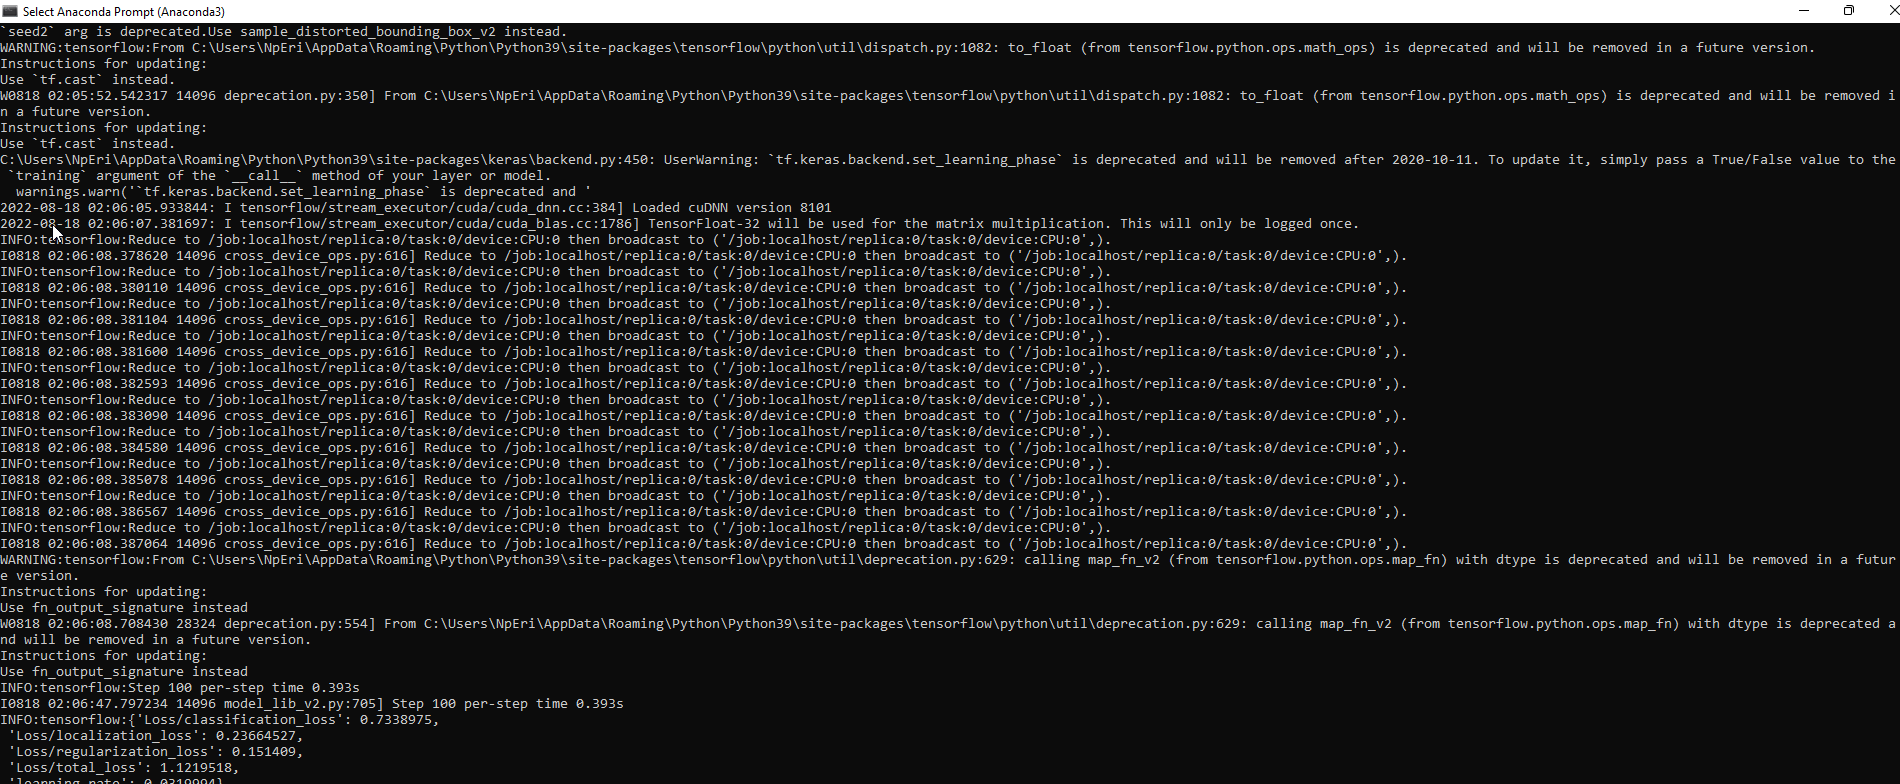

### 8. Evaluate Model

In [ ]:
model_train_script = 'model_main_tf2.py'
model_filepath= os.path.join('trained_models',f'{PRETRAINED_MODEL_NAME}')
pipeline_filepath = os.path.join('pipeline_configs',f'{PRETRAINED_MODEL_NAME}_pipeline.config')
command = "python {} --model_dir={} --pipeline_config_path={} --alsologtostderr".format(model_train_script,model_filepath, pipeline_filepath)
#python model_main_tf2.py --pipeline_config_path=x/pipeline.config --model_dir=_____ --alsologtostderr
print(command)

In [11]:
model_train_script = 'model_main_tf2.py'
model_filepath= os.path.join('trained_models',f'{PRETRAINED_MODEL_NAME}')
pipeline_filepath = os.path.join('pipeline_configs',f'{PRETRAINED_MODEL_NAME}_pipeline.config')
checkpoint_dir = os.path.join('trained_models',f'{PRETRAINED_MODEL_NAME}')
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={} --alsologtostderr".format(model_train_script,model_filepath, pipeline_filepath,checkpoint_dir)
#python model_main_tf2.py --pipeline_config_path=x/pipeline.config --model_dir=_____ --alsologtostderr
print(command)

python model_main_tf2.py --model_dir=trained_models\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8 --pipeline_config_path=pipeline_configs\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8_pipeline.config --checkpoint_dir=trained_models\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8 --alsologtostderr


In [ ]:
### Load Train Model from Checkpoint

### 9. Export Inference Graph 

In [20]:
!mkdir inference_graph
!move {os.path.join('inference_graph')} {model_filepath}

A subdirectory or file inference_graph already exists.


        1 dir(s) moved.


In [22]:
exporter_script = os.path.join('scripts','exporter_main_v2.py')
trained_checkpoint_dir = model_filepath
pipeline_filepath = os.path.join('pipeline_configs',f'{PRETRAINED_MODEL_NAME}_pipeline.config')
output_directory = os.path.join(model_filepath,'inference_graph')

command = "python {} --trained_checkpoint_dir={} --pipeline_config_path={} --output_directory={} ".format(exporter_script,trained_checkpoint_dir,pipeline_filepath,output_directory)
print(command)
#python {} --trained_checkpoint_dir={} --pipeline_config_path={} --output_directory /mydrive/customTF2/data/inference_graph

python scripts\exporter_main_v2.py --trained_checkpoint_dir=trained_models\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8 --pipeline_config_path=pipeline_configs\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8_pipeline.config --output_directory=trained_models\ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8\inference_graph 


In [ ]:
!{command}

#  9.1 Export Inference Graph as TFLite (OPTIONAL)

In [ ]:
#NOTE, NOT ALL MODELS CAN BE CONVERTED TO TFLite due to unsupported ops

# Convert the model
saved_model_dir=os.path.join('trained_models','efficientdet_d1_coco17_tpu-32','inference_graph','saved_model')

#saved_model_dir = os.path.join('trained_model','inference_graph','saved_model')
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
efficientdet_tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(efficientdet_tflite_model)

In [ ]:
#python models/research/object_detection/model_main_tf2.py --model_dir=/models/research/object_detection/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint --pipeline_config_path=model_checkpoints/pipeline.config --num_train_steps=2000 --logtostderr --train_dir=training/ 